<a href="https://colab.research.google.com/github/AdityaKumbhar21/Machine_Learning/blob/main/Clustering_Algortihms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [31]:
df = pd.read_csv('/content/mall.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [32]:
df.shape

(200, 5)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [40]:
df_updated = df.iloc[:,3:5]
df_updated.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [41]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_sc = sc.fit_transform(df_updated)

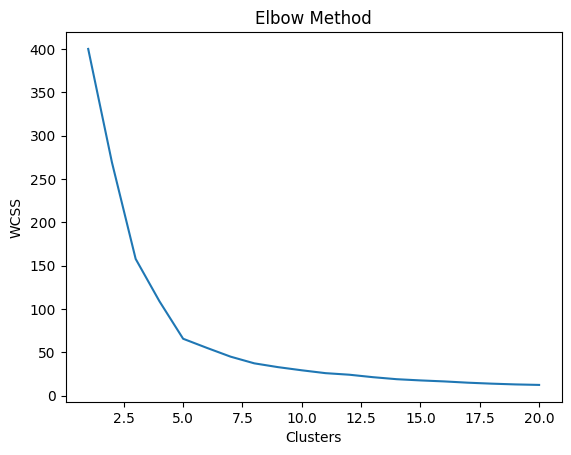

In [43]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,21):
  kmeans = KMeans(n_clusters = i, init='k-means++', max_iter=300, random_state=None, n_init=10)
  kmeans.fit(df_sc)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,21), wcss)
plt.title("Elbow Method")
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()

In [44]:
# we will try with 5 and 7 clusters

kmeans= KMeans(n_clusters = 5, random_state = None, init = 'k-means++')
y_kmeans = kmeans.fit_predict(df_sc)

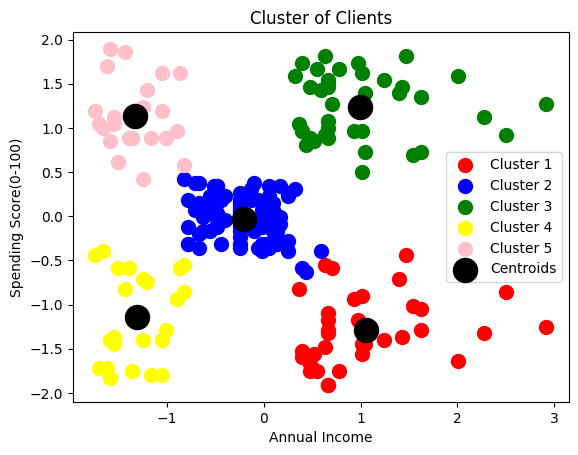

In [52]:
plt.scatter(df_sc[y_kmeans==0, 0], df_sc[y_kmeans ==0,1], s = 100, c="red", label = "Cluster 1")
plt.scatter(df_sc[y_kmeans==1, 0], df_sc[y_kmeans ==1,1], s = 100, c="blue", label = "Cluster 2")
plt.scatter(df_sc[y_kmeans==2, 0], df_sc[y_kmeans ==2,1], s = 100, c="green", label = "Cluster 3")
plt.scatter(df_sc[y_kmeans==3, 0], df_sc[y_kmeans ==3,1], s = 100, c="yellow", label = "Cluster 4")
plt.scatter(df_sc[y_kmeans==4, 0], df_sc[y_kmeans ==4,1], s = 100, c="pink", label = "Cluster 5")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c="black", label = "Centroids")

plt.title("Cluster of Clients")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score(0-100)")
plt.legend()
plt.show()
